In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df= pd.read_csv('prod_arroz_grano_flor.cvs')


In [4]:
df.sample(10)

,variedad,periodo,prod_grano,prod_fillna,nombre_var,prod_floral
68,Variedad_4,Julio,NaN,258.742811,Sushi,81
890,Variedad_7,Septiembre,388.931586,388.931586,Carnaroli,90
341,Variedad_6,Julio,173.382280,173.382280,Negro Venere,59
757,Variedad_5,Agosto,NaN,302.044726,Valencia,64
246,Variedad_9,Septiembre,NaN,279.484870,Bomba,40
547,Variedad_9,Septiembre,280.284291,280.284291,Bomba,43
802,Variedad_1,Septiembre,NaN,336.187431,Arborio,23
834,Variedad_5,Julio,NaN,323.656949,Valencia,25
612,Variedad_10,Junio,287.624491,287.624491,Wild Rice,75
537,Variedad_7,Agosto,322.814757,322.814757,Carnaroli,52


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variedad     1346 non-null   object 
 1   periodo      1346 non-null   object 
 2   prod_grano   1187 non-null   float64
 3   prod_fillna  1346 non-null   float64
 4   nombre_var   1346 non-null   object 
 5   prod_floral  1346 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 63.2+ KB


In [6]:
df.describe()

,prod_grano,prod_fillna,prod_floral
count,1187.000000,1346.000000,1346.000000
mean,301.613074,301.442373,59.664933
std,158.776807,149.291738,22.204656
min,44.907983,44.907983,21.000000
25%,179.347130,188.247384,41.000000
50%,269.796649,284.186939,60.000000
75%,409.223856,387.604297,78.750000
max,757.862331,757.862331,97.000000


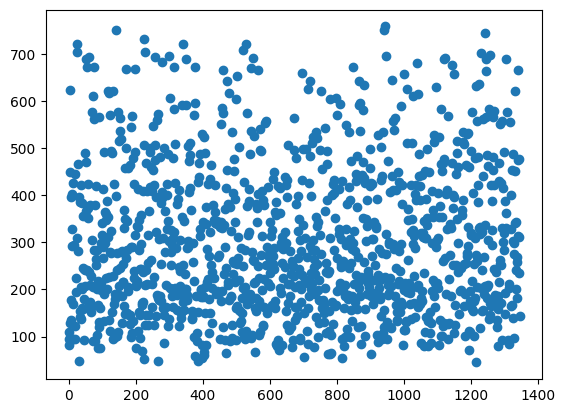

In [7]:
plt.plot(df.prod_grano,'o')
plt.show()

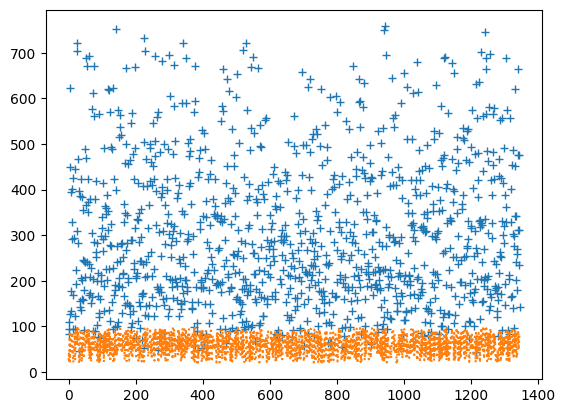

In [8]:
plt.plot(df.prod_grano,'+')
plt.plot(df.prod_floral,':')
plt.show()

In [9]:
df_groupby = df.groupby(['periodo']).mean(numeric_only=True)
df_groupby

,prod_grano,prod_fillna,prod_floral
periodo,,,
Agosto,300.720858,300.488763,59.693878
Julio,299.852394,299.684557,59.309659
Junio,298.497554,298.505303,58.872449
Septiembre,305.047934,304.786340,60.259341


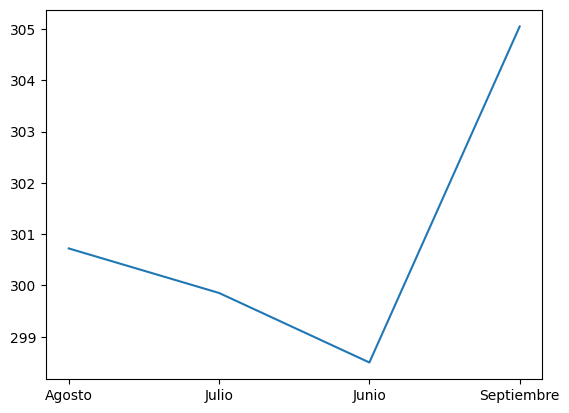

In [10]:
plt.plot(df_groupby.prod_grano)

In [11]:
order= ["Junio","Julio","Agosto","Septiembre"]
df_groupby = df_groupby.loc[order]

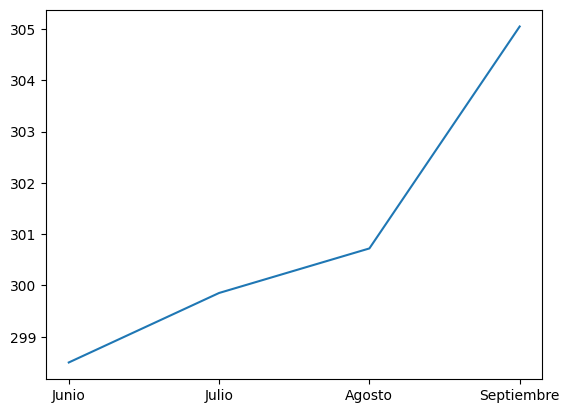

In [12]:
plt.plot(df_groupby.prod_grano)
plt.show()

September is the peak of the rice production

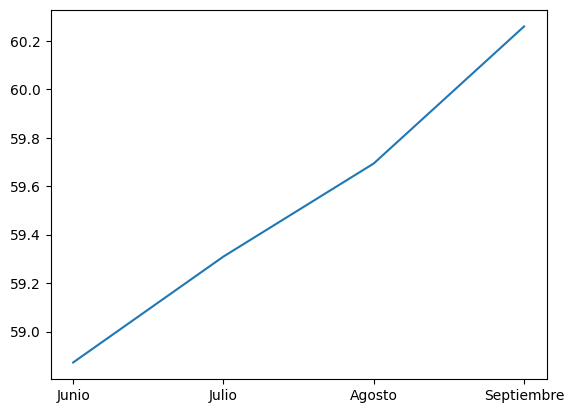

In [13]:

plt.plot(df_groupby.prod_floral)
plt.show()

In [14]:
df_groupbysum = df.groupby(['periodo']).sum(numeric_only=True)

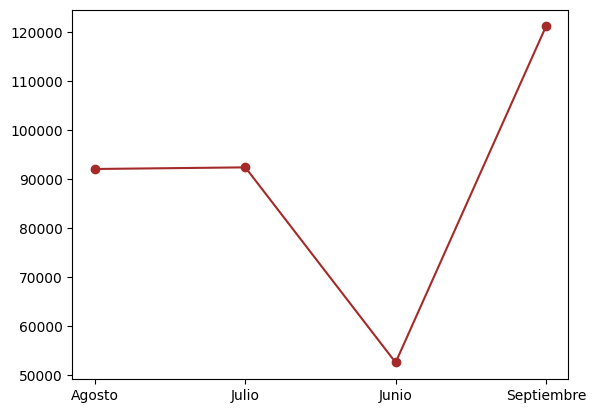

In [15]:
plt.plot(df_groupbysum.prod_grano,ls="-",marker="o",color="brown")
plt.show()

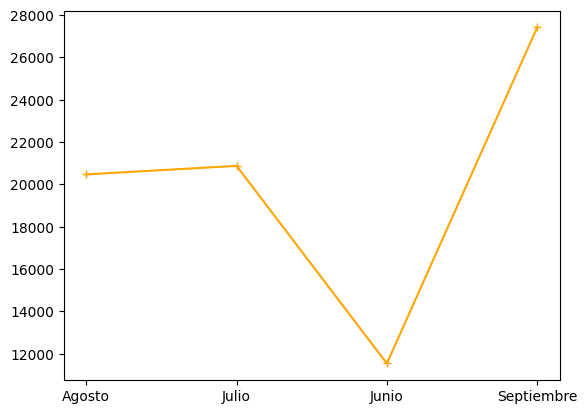

In [16]:
plt.plot(df_groupbysum.prod_floral,ls="-",marker="+",color="orange")
plt.show()

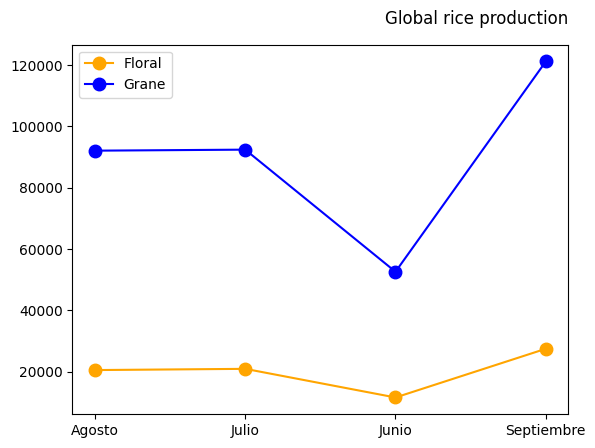

In [21]:
plt.plot(df_groupbysum.prod_floral,ls="-",marker="o",color="orange",markersize =9,label ='Floral')
plt.plot(df_groupbysum.prod_grano,ls="-",marker="o",color="blue",markersize =9, label ='Grane')
plt.title('Global rice production',loc= 'right', pad = 15)
plt.legend()
plt.show()

In [22]:
df_groupbysum.reset_index(inplace=True)

In [23]:
df_groupbysum

,periodo,prod_grano,prod_fillna,prod_floral
0,Agosto,92020.582555,103067.645626,20475
1,Julio,92354.537381,105488.963969,20877
2,Junio,52535.569525,58507.039473,11539
3,Septiembre,121104.029925,138677.784602,27418


In [25]:
df_groupby.reset_index(inplace=True)

In [26]:
df_groupby

,periodo,prod_grano,prod_fillna,prod_floral
0,Junio,298.497554,298.505303,58.872449
1,Julio,299.852394,299.684557,59.309659
2,Agosto,300.720858,300.488763,59.693878
3,Septiembre,305.047934,304.786340,60.259341


In [27]:
df_groupbysum = df.groupby(['variedad']).sum(numeric_only=True)

In [30]:
df_groupbysum

,variedad,prod_grano,prod_fillna,prod_floral
0,Variedad_1,39153.705885,44181.744927,8377
1,Variedad_10,31484.175572,34238.681608,7423
2,Variedad_2,35603.831408,40920.977054,7758
3,Variedad_3,35430.725363,38904.137064,7861
4,Variedad_4,33814.926661,38391.987816,8186
5,Variedad_5,40390.176386,47574.939540,9259
6,Variedad_6,36874.883734,41510.465151,8201
7,Variedad_7,35024.376760,38781.386850,7636
8,Variedad_8,37994.810227,41551.995896,7994
9,Variedad_9,32243.107391,39685.117766,7614


In [29]:
df_groupbysum.reset_index(inplace=True)

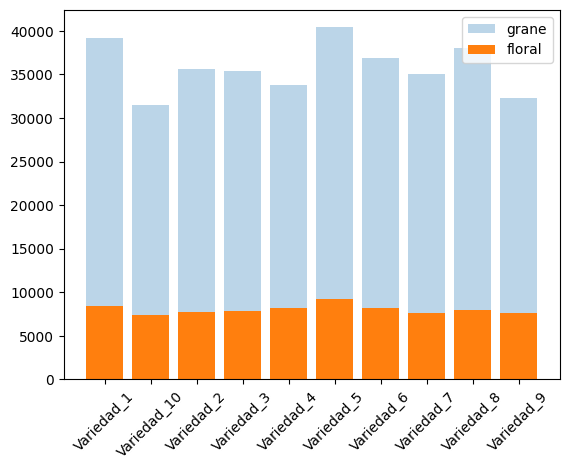

In [34]:
plt.bar(df_groupbysum.variedad,df_groupbysum.prod_grano, label= 'grane', alpha=0.3)
plt.bar(df_groupbysum.variedad,df_groupbysum.prod_floral, label='floral')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Relation between rice grane and rice flower

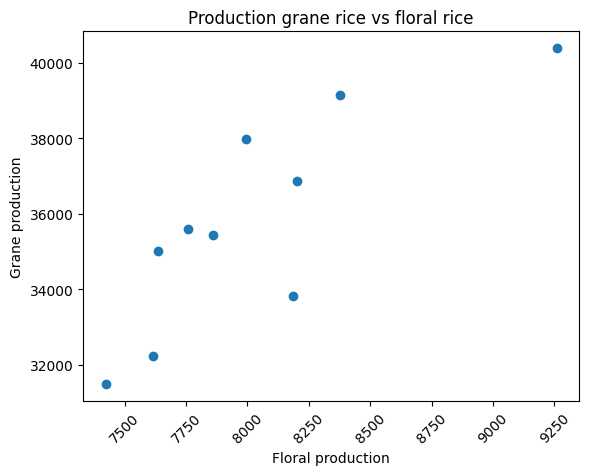

In [35]:
plt.scatter(df_groupbysum.prod_floral, df_groupbysum.prod_grano)
plt.xticks(rotation=45)
plt.xlabel('Floral production')
plt.ylabel('Grane production')
plt.title('Production grane rice vs floral rice')
plt.show()

Compartition of all the registrations.

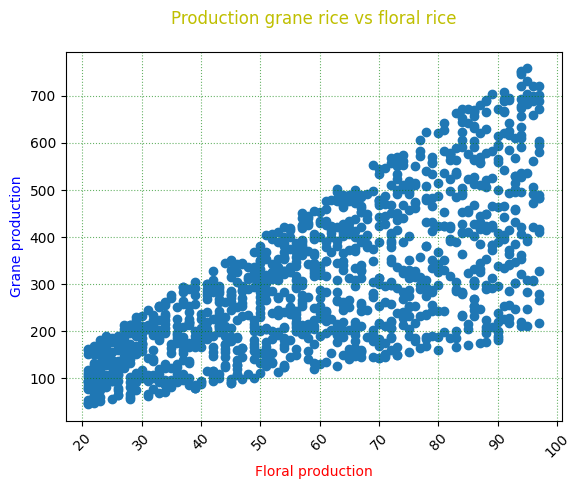

In [40]:
plt.scatter(df.prod_floral, df.prod_grano)
plt.xticks(rotation=45)
plt.xlabel('Floral production', c='r')
plt.ylabel('Grane production',c='b')
plt.grid(ls=':',alpha = 0.6,c='green')
plt.title('Production grane rice vs floral rice', pad=20, c='y')
plt.show()